# Jordan Roberts

## EDA and Data Analysis Pipeline

### I am interested in how the budget has affected the choice of movie format over time.
#### Did the switch to digital happen because of a decrease in necessary budget?

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

movie_data = pd.read_csv("../data/raw/top_movies.csv")



In [ ]:
movie_data.nunique(axis=0)
movie_data.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))


,production_year,id,budget
count,1195.000000,1195.000000,1195.000000
mean,2011.492887,3974297.446025,65826104.602510
std,3.434807,408547.436479,59738936.941028
min,2006.000000,3212915.000000,0.000000
25%,2008.500000,3634968.500000,22250000.000000
50%,2011.000000,4022548.000000,45000000.000000
75%,2014.000000,4361249.500000,90000000.000000
max,2017.000000,4607464.000000,378500000.000000


basic data on dataset

In [ ]:
movie_data_imp = movie_data.copy().drop(['directors','camera_format','negative_format','budget_source'], axis=1)
movie_data_cleaned=movie_data_imp[movie_data_imp['budget']>0]
movie_data_cleaned=movie_data_cleaned.dropna(axis=0)
movie_data_cleaned.nunique(axis=0)
movie_data_cleaned.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))


,production_year,id,budget
count,1174.000000,1174.000000,1174.000000
mean,2011.506814,3974984.177172,67003573.253833
std,3.419697,408046.885385,59612659.875410
min,2006.000000,3212915.000000,100000.000000
25%,2009.000000,3639312.250000,25000000.000000
50%,2012.000000,4023164.500000,45000000.000000
75%,2014.000000,4360459.000000,90000000.000000
max,2017.000000,4607464.000000,378500000.000000


remove any null values or movies with budget of 0

AxesSubplot(0.125,0.11;0.62x0.77)


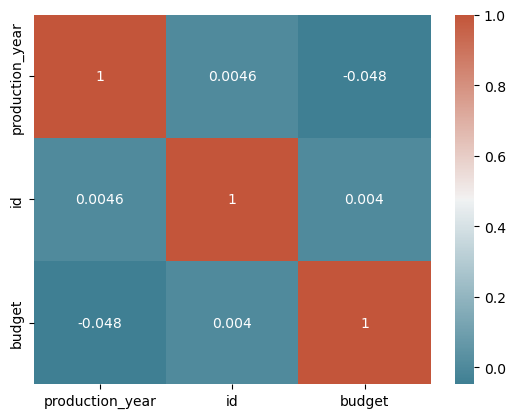

In [ ]:
movie_digital=movie_data_cleaned.query("film_type=='D'")
movie_film=movie_data_cleaned.query("film_type=='F'")
corr = movie_digital.corr()
g=sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
           annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
print(g)

AxesSubplot(0.125,0.11;0.62x0.77)


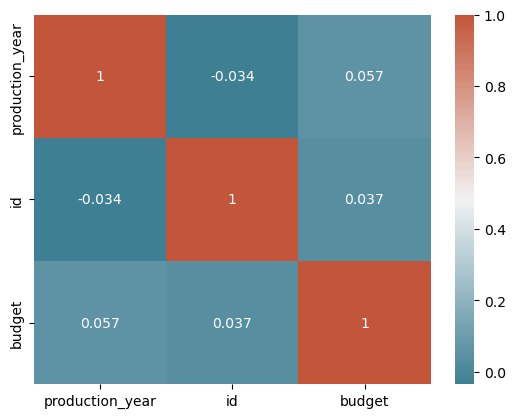

In [ ]:
corr2 = movie_film.corr()
h=sns.heatmap(corr2, xticklabels=corr2.columns, yticklabels=corr2.columns,
           annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
print(h)

This shows some slight correlation between budget and production year, showing that digital has decreased over time, while film has increased.

<seaborn.axisgrid.FacetGrid>

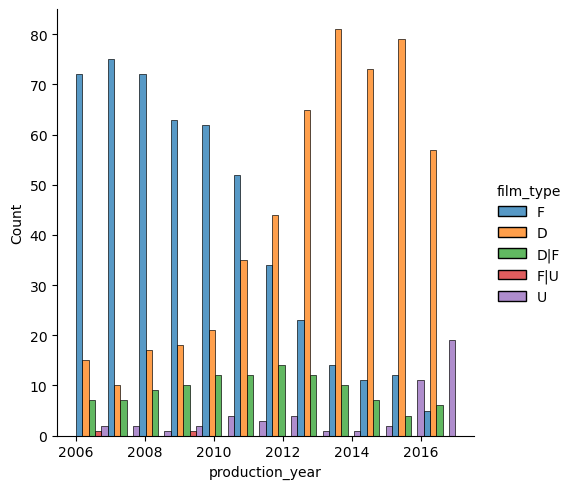

In [ ]:
sns.displot(x=movie_data_cleaned["production_year"], hue=movie_data_cleaned["film_type"], multiple="dodge")

This shows the switchover from Film to Digital, which clearly culminated in 2012 when digital overtook film

<AxesSubplot:xlabel='production_year', ylabel='budget'>

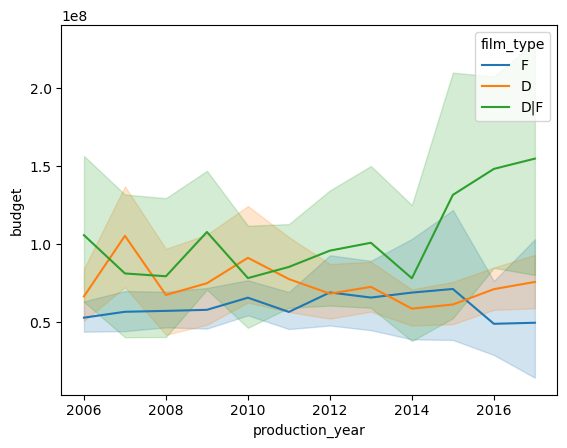

In [ ]:
df_FD=movie_data_cleaned.query("film_type!=['U','F|U']")
sns.lineplot(x=df_FD["production_year"], y=df_FD["budget"], hue=df_FD["film_type"])

This shows a difference in budget over time. Doesn't really show much.

## Method Chaining

<AxesSubplot:xlabel='production_year', ylabel='budget'>

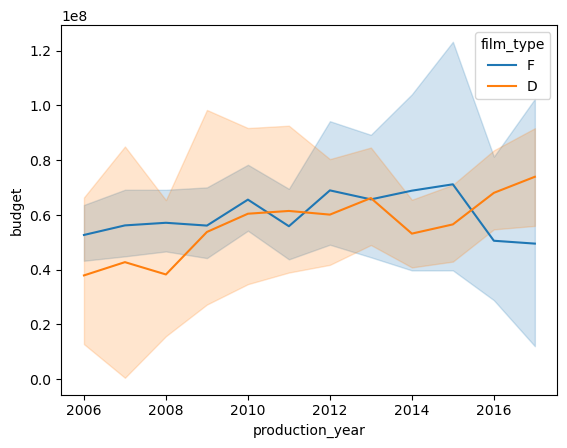

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import project_functions2 as pf2

df1= pd.read_csv("../data/raw/top_movies.csv")
df1=(
        df1
        .copy().drop(['title','directors','camera_format','negative_format','budget_source','genres'], axis=1)
        .dropna(axis=0)
        .query("film_type==['D','F']")
        .query("budget>0")
        
    )

# Analysis with Method Chain file

<AxesSubplot:xlabel='production_year', ylabel='budget'>

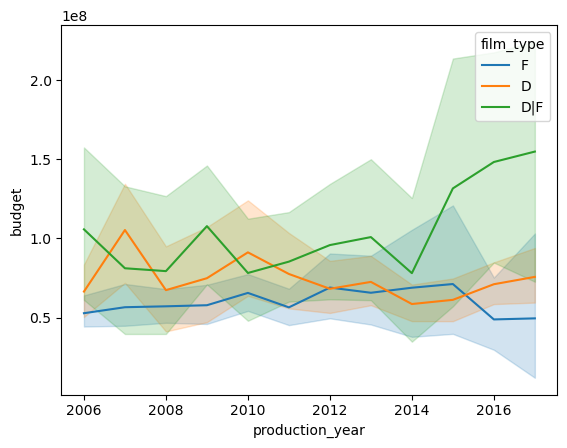

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import project_functions2 as pf2
import matplotlib.pyplot as plt

df = pf2.load_and_process("../data/raw/top_movies.csv")
df.to_csv("../data/processed/analysis2processed.csv")
sns.lineplot(x=df["production_year"], y=df["budget"], hue=df["film_type"])

This is cool, but it just shows the difference in budget over time, without the amount of films produced taken into account.

<seaborn.axisgrid.FacetGrid>

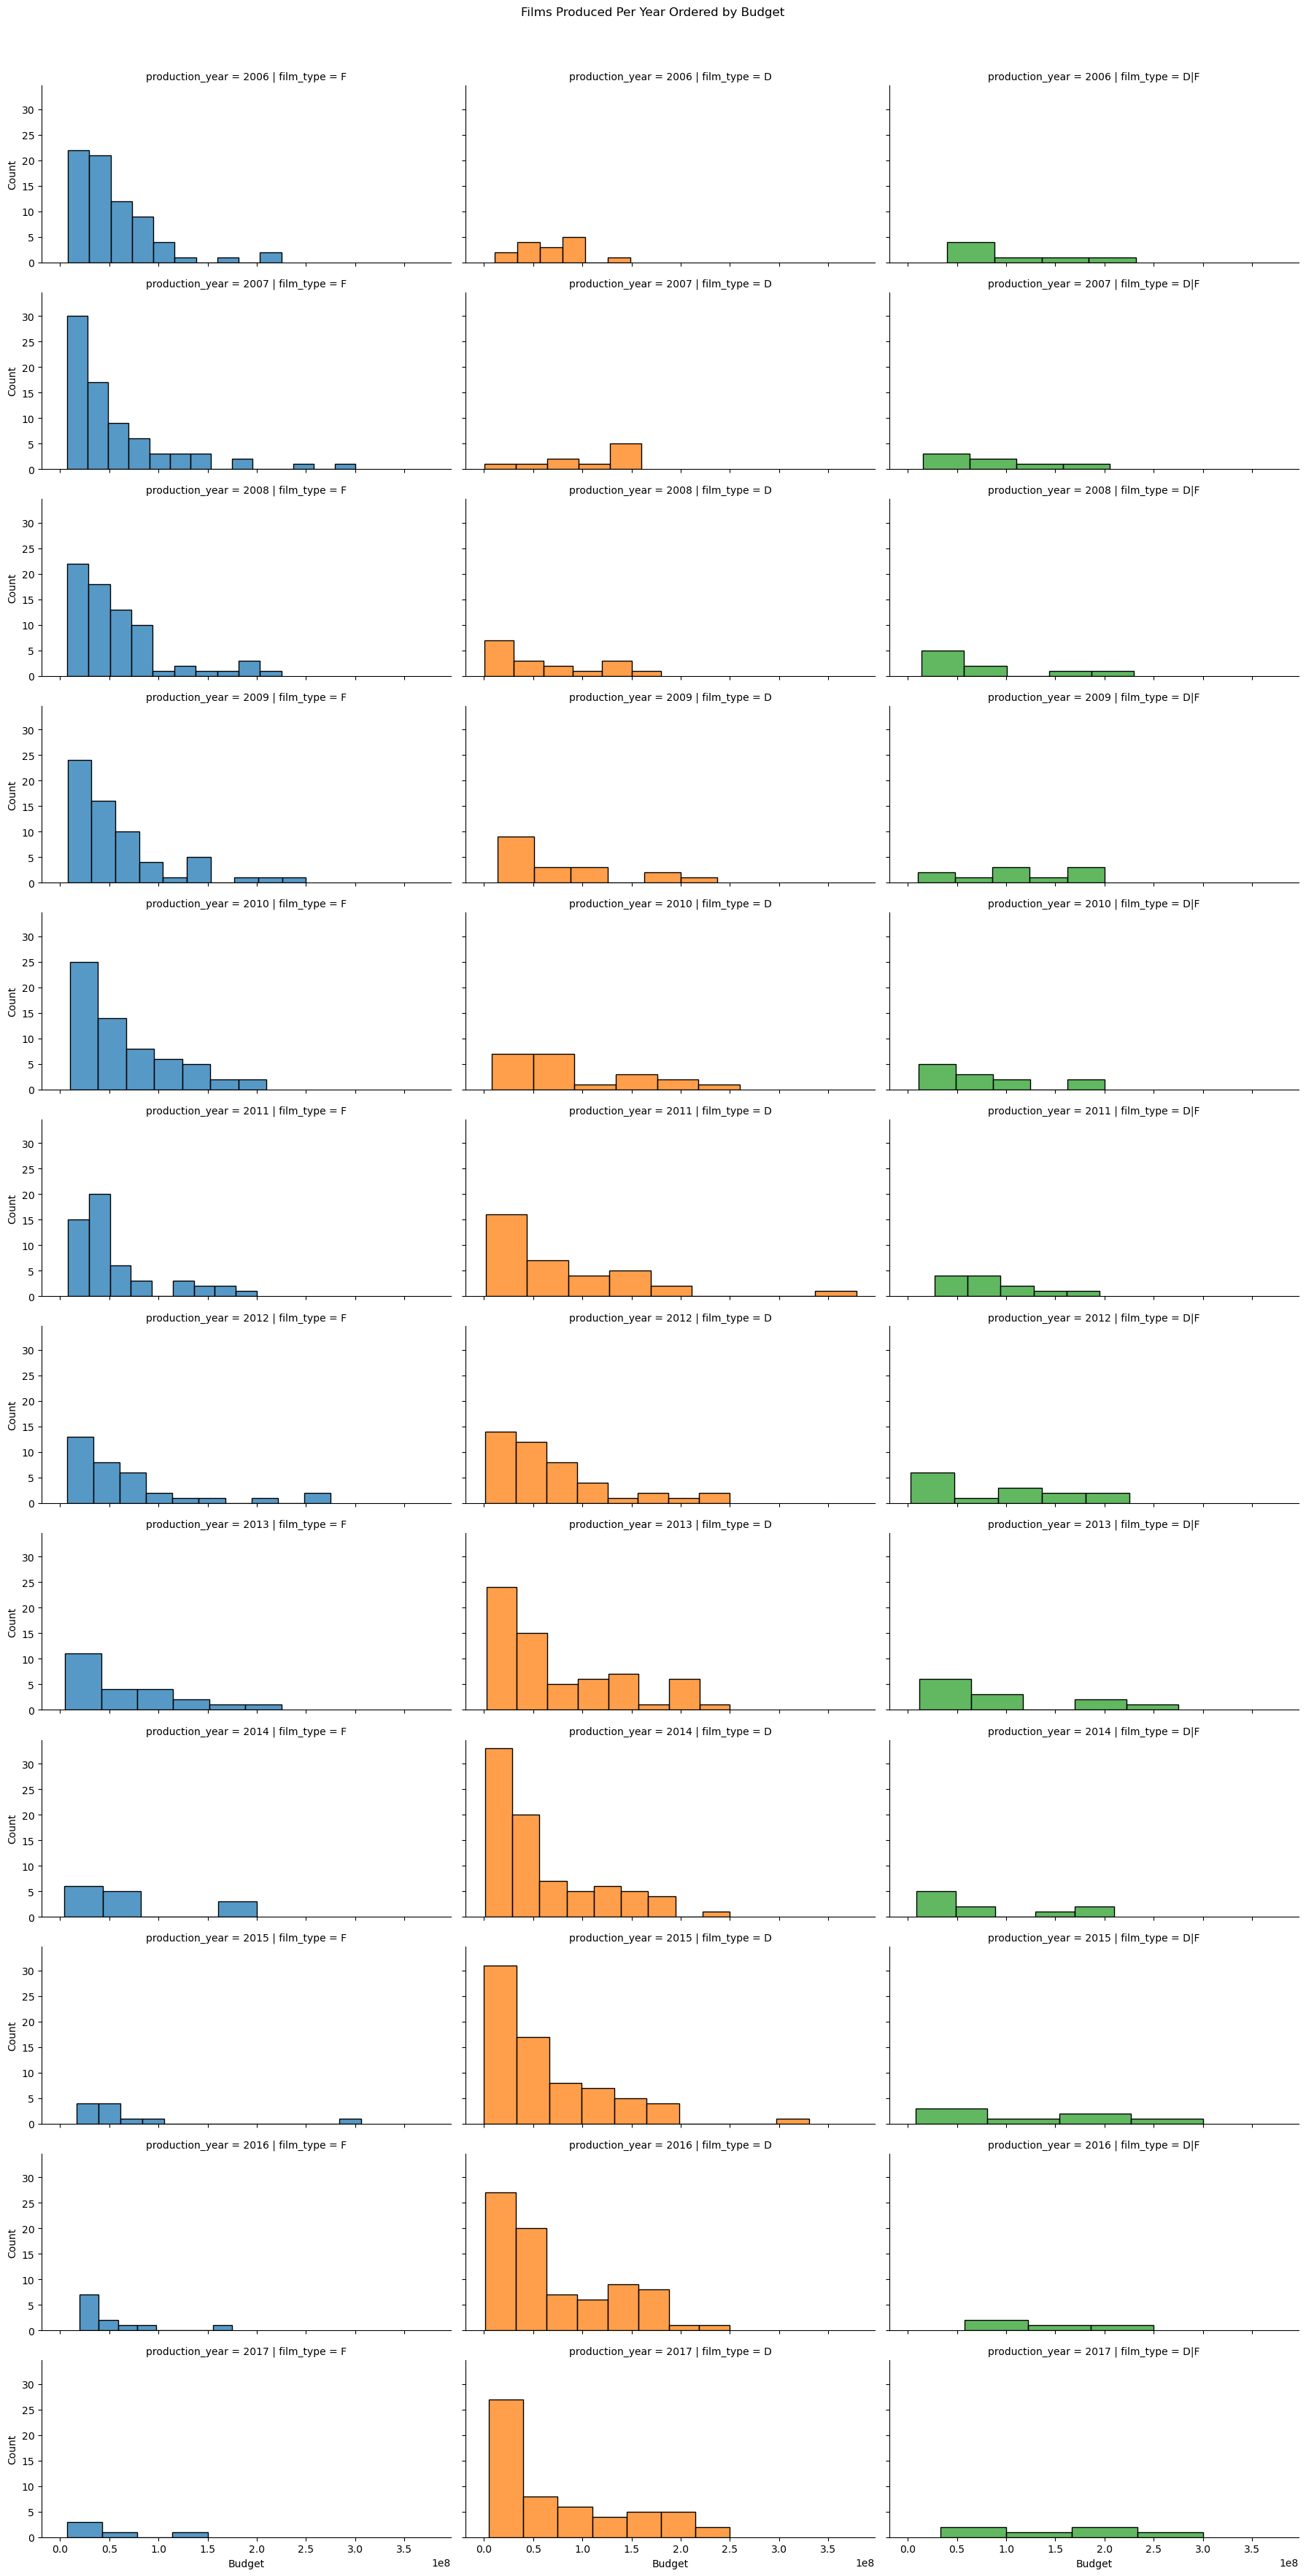

In [ ]:
g = sns.FacetGrid(data=df,
    col="film_type",row="production_year",hue="film_type",aspect=2)
g.map(sns.histplot,"budget")
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle('Films Produced Per Year Ordered by Budget')
g.set_xlabels(label="Budget")

## Analysis using the above information:
It seems although the amount of movies produced on film has definitely reduced dramatically, replaced by Digital, it is inconclusive the affect of budgetary constraints on this.

Through the early 2000s there were barely any digital films produced, meaning it probably wasn't worth either the price tag of production or of switching over the entire operation to digital. After looking at the data it looks like the cost of each style evened out around 2013, and due to the easier use-factor of digital it grew from there. Prior to 2013, film dominated the top-grossing movie market.